# Charting the different "Alpha" indices

The NSE has quite a few "strategy" [indices](https://www.nseindia.com/products/content/equities/indices/strategic_indices.htm) floating about. Here is how you explore then on pluto.

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(RPostgres)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)
library(reshape2)
library(ggrepel)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")
source("goofy/misc.common.R")

#initialize
indices<-Indices()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Registering fonts with R

Attaching package: 

In [2]:
#what are the start and end-dates for which total-return (TR) indices are available for 'alpha' incies?

#documentation: https://plutopy.readthedocs.io/en/latest/Indices.html

alphaIndices <- indices$NseTimeSeries() %>%
    filter(NAME %like% '%alpha% TR') %>%
    group_by(NAME) %>%
    summarize(ST = min(TIME_STAMP, na.rm=T), ET = max(TIME_STAMP, na.rm=T)) %>%
    arrange(desc(ST)) %>%
    collect()

alphaIndices %>% print()

# A tibble: 5 x 3
  NAME                                           ST         ET        
  <chr>                                          <date>     <date>    
1 NIFTY ALPHA LOW-VOLATILITY 30 TR               2005-04-01 2019-07-23
2 NIFTY ALPHA QUALITY VALUE LOW-VOLATILITY 30 TR 2005-04-01 2019-07-23
3 NIFTY100 ALPHA 30 TR                           2005-04-01 2019-07-23
4 NIFTY ALPHA QUALITY LOW-VOLATILITY 30 TR       2005-04-01 2019-07-23
5 NIFTY ALPHA 50 TR                              2003-12-31 2019-07-23


In [3]:
# it looks like most of them are covered through 2005-04-01

startDate <- as.Date("2005-04-01")

dailies <- NULL
for(index in alphaIndices$NAME){
    pxDt <- indices$NseTimeSeries() %>%
        filter(NAME == index & TIME_STAMP >= startDate) %>%
        select(TIME_STAMP, CLOSE) %>%
        collect()
    
    dailies <- merge.xts(dailies, dailyReturn(xts(pxDt$CLOSE, pxDt$TIME_STAMP)))
}

names(dailies) <- alphaIndices$NAME

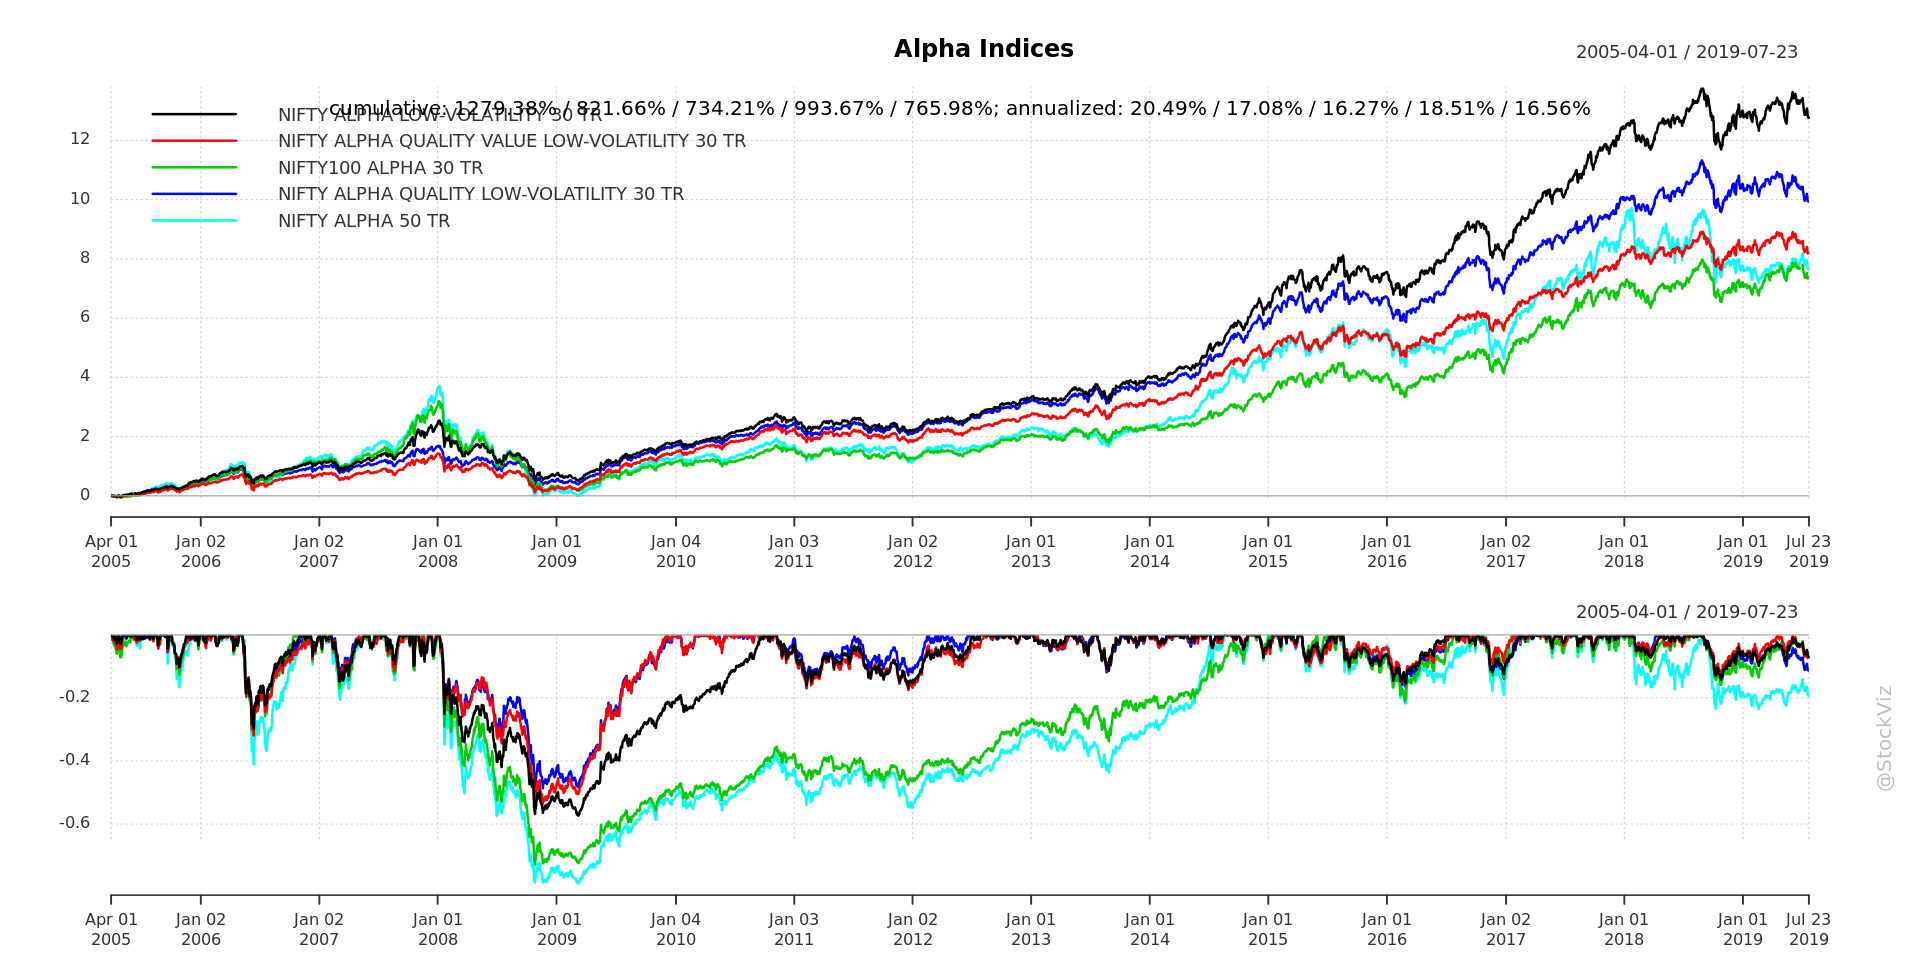

In [4]:
Common.PlotCumReturns(dailies, "Alpha Indices", NA)

### tl;dr

1. If you want a quick recovery from panic drawdowns, go with the one with "quality" attached. 
1. The "best" in terms of performance is the NIFTY ALPHA LOW-VOLATILITY 30 TR [index](https://www.niftyindices.com/indices/equity/strategy-indices/nifty-alpha-low-volatility-30). 
1. Caveat: it also includes stocks from the MIDCAP-50 index.

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)